In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
coffe_export = pd.read_csv('data_cafe/Coffee_export.csv')

In [11]:
# Preparar los datos
X = coffe_export.drop(['Country', 'Total_export'], axis=1)  # Características
y = coffe_export['Total_export']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluar el modelo
score = rf.score(X_test, y_test)
print(f'Accuracy: {score*100}%')

Accuracy: 99.7677792386613%


Accuracy: 99.7677792386613%


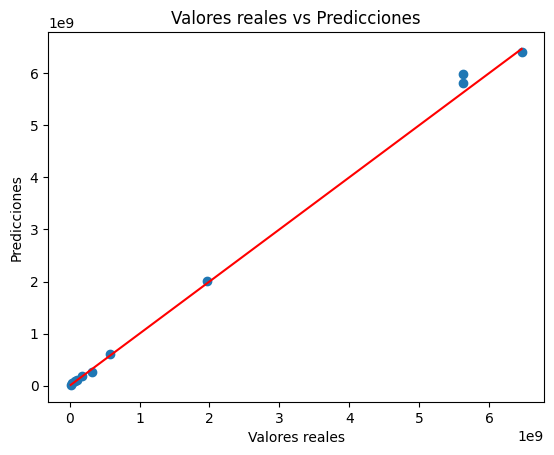

In [15]:
# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Graficar las predicciones frente a los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')

# Agregar una línea diagonal
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

# Evaluar el modelo
score = rf.score(X_test, y_test)
print(f'Accuracy: {score*100}%')

In [8]:
from sklearn.model_selection import cross_val_score

# Preparar los datos
X = coffe_export.drop(['Country', 'Total_export'], axis=1)  # Características
y = coffe_export['Total_export']  # Variable objetivo

# Crear el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar la validación cruzada
scores = cross_val_score(rf, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print(f'Scores: {scores}')
print(f'Mean score: {scores.mean()}')

Scores: [0.73085291 0.99565871 0.93731266 0.979042   0.83881937]
Mean score: 0.8963371293058847


Scores: [0.73085291 0.99565871 0.93731266 0.979042   0.83881937]
Mean score: 0.8963371293058847


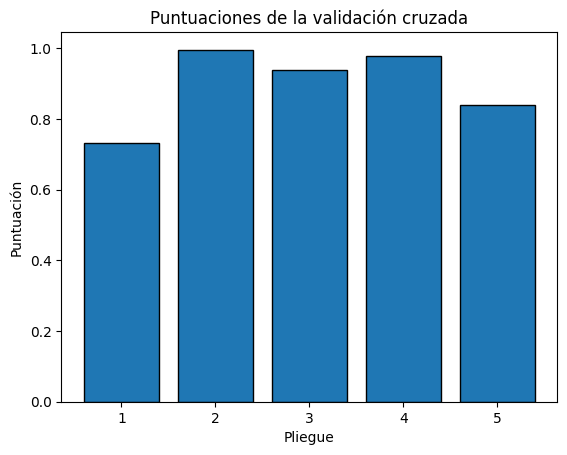

In [14]:
# Realizar la validación cruzada
scores = cross_val_score(rf, X, y, cv=5)

# Crear un gráfico de barras de las puntuaciones
plt.bar(np.arange(1, 6), scores, edgecolor='black')
plt.xlabel('Pliegue')
plt.ylabel('Puntuación')
plt.title('Puntuaciones de la validación cruzada')

# Imprimir los resultados de la validación cruzada
print(f'Scores: {scores}')
print(f'Mean score: {scores.mean()}')

In [16]:
# Guarda el modelo
import pickle

archivo= 'modelo_cafe.pkl'
pickle.dump(rf, open(archivo, 'wb'))